
# Incentive Function in Annuity Mortgage

In this notebook, we explain the role of an incentive function within an annuity mortgage context. The function is designed to adjust incentives based on the difference between a fixed (old) interest rate and a varying (new) market rate. This example demonstrates how such an incentive may be modeled using a logistic function.

---

## The Incentive Function

The incentive function is defined as follows:

$$
I(x) = 0.04 + \frac{0.1}{1 + \exp\left(115\,(0.02 - x)\right)}
$$

where:
- $x$ is the difference between the old fixed rate and the new market rate (denoted as $\epsilon$ below).
- The constant **0.04** is the baseline incentive.
- The term **0.1** is the additional incentive available.
- The logistic function $\frac{1}{1 + \exp\left(115\,(0.02 - x)\right)}$ introduces a steep transition (with steepness factor $115$) around the threshold value $x = 0.02$.

**Intuition:**
- **Baseline and Additional Incentive:** The incentive starts at a baseline of 4% and can increase by up to an additional 10% based on the difference $x$.
- **Logistic Behavior:** The logistic function smoothly transitions from low to high values around $x = 0.02$. When $x$ is much less than $0.02$, the incentive is near the baseline; when $x$ exceeds $0.02$, the incentive rises sharply toward a maximum value.
- **Practical Use:** In an annuity mortgage, this function can model the extra benefit (or cost adjustment) due to prepayment or refinancing opportunities. If the market rate is lower than the fixed rate, the borrower might have a higher incentive to refinance (or there might be compensation mechanisms for early prepayment), and vice versa.

---

## Code Explanation

Below is the code snippet along with its explanation.

```python
def main():
    # Define the incentive function using a lambda (anonymous function)
    IncentiveFunction = lambda x : 0.04 + 0.1/(1 + np.exp(115 * (0.02 - x))) 
    
    # Define the fixed (old) rate for the annuity mortgage
    oldRate = 0.05
    
    # Define a range of new market rates from -5% to 15%
    newRate = np.linspace(-0.05, 0.15, 25)
    
    # Compute epsilon, the difference between the fixed rate and new market rates
    epsilon = oldRate - newRate
    
    # Evaluate the incentive function for each value of epsilon
    incentive = IncentiveFunction(epsilon)
    
    # Plot incentive as a function of new market rate
    plt.figure(1)
    plt.plot(newRate, incentive)
    plt.xlabel('New Market Rate, S(t)')
    plt.ylabel('Incentive')
    plt.grid()
    
    # Plot incentive as a function of epsilon (the rate difference)
    plt.figure(2)
    plt.plot(epsilon, incentive)
    plt.xlabel(r'$\epsilon = K - S(t)$')
    plt.ylabel('Incentive')
    plt.grid()
```

### Detailed Breakdown

1. **Defining the Incentive Function:**
   - The lambda function is defined as:
     $$
     I(x) = 0.04 + \frac{0.1}{1 + \exp\left(115\,(0.02 - x)\right)}
     $$
     This function will be applied to the difference $\epsilon$ between the fixed rate and the new market rate.

2. **Old Rate vs. New Rate:**
   - **`oldRate = 0.05`**: This represents the fixed interest rate of the mortgage (or the contract rate).
   - **`newRate = np.linspace(-0.05, 0.15, 25)`**: This creates an array of 25 evenly spaced values between -5% and 15%, representing possible market rates.

3. **Computing $\epsilon$:**
   - $\epsilon$ is calculated as:
     $$
     \epsilon = \text{oldRate} - \text{newRate}
     $$
     This difference indicates how favorable the market rate is compared to the fixed rate. A positive $\epsilon$ means the old rate is higher than the new rate, typically providing a stronger incentive.

4. **Evaluating the Incentive:**
   - The incentive for each $\epsilon$ is computed using the defined incentive function.

5. **Plotting the Results:**
   - **Figure 1:** Plots the incentive against the new market rate ($S(t)$).
   - **Figure 2:** Plots the incentive against $\epsilon$, emphasizing how the incentive changes as the difference between the fixed and market rates varies.

---

## Intuition Behind Parameter Choices

- **Old Rate ($K$):**  
  Represents the fixed contractual interest rate of the mortgage. It is the benchmark against which market conditions are compared.

- **New Rate ($S(t)$):**  
  Represents the current market rate. It may change over time, influencing the borrower's behavior regarding prepayment or refinancing.

- **Epsilon ($\epsilon = K - S(t)$):**  
  This value quantifies the benefit (or disadvantage) from the perspective of the borrower:
  - If $\epsilon > 0$ (i.e., $K > S(t)$): The market rate is lower than the fixed rate, creating a strong incentive (or benefit) to refinance or prepay.
  - If $\epsilon < 0$ (i.e., $K < S(t)$): The market rate is higher, reducing the incentive.

- **Steepness and Threshold:**  
  The logistic function with a steepness factor of $115$ ensures that the incentive changes very rapidly around the threshold value of $x = 0.02$. This models situations where small changes in the rate difference can lead to significant changes in incentive.

---



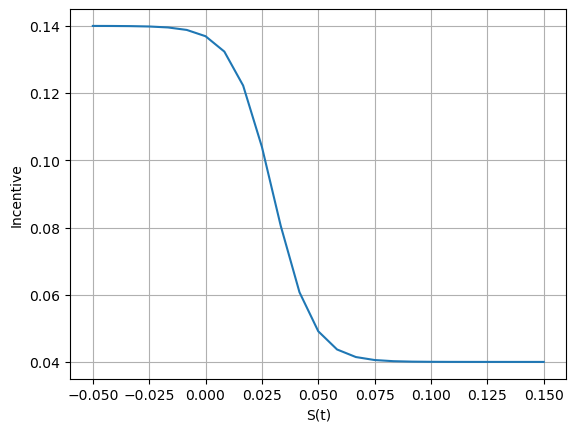

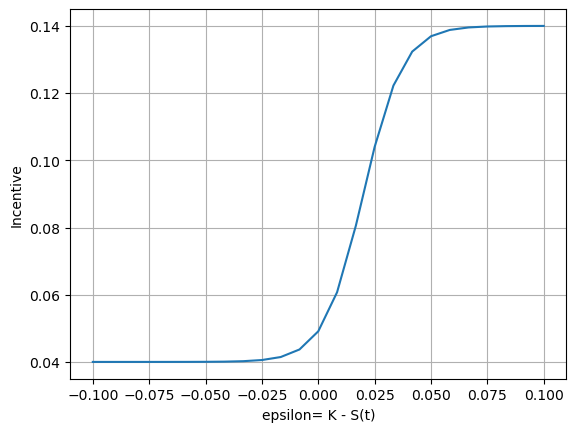

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def Annuity(rate,notonal,periods,CPR):
    # it returns a matrix M such that
    # M=  [0,       1,            2,           3,                4              5]
    # M = [t  notional(t)  prepayment(t)  notional_quote(t)  interest_(t)  installment(t)]
    # WARNING! here "rate" and "periods" are quite general, the choice of getting year/month/day.. steps, depends on the rate
    # that the function receives. So, it is necessary to pass the correct rate to the function
    M=np.zeros((periods+1,6))
    M[:,0]=np.arange(periods+1)# time
    M[0,1]=notonal
    for t in range(1,periods):
        remaing_period=periods-(t-1)
        # installmet C(t_i)
        M[:,5]=rate*M[t-1,1]/(1-1/(1+rate)**remaing_period)
        # intrest payemnt I(t_i)=K*N(t_{i})
        M[:,4]=rate*M[t-1,1]
        # notoanl payment Q(t_i)=C(t_i)-I(t-i)
        M[t,3]=M[t,5]-M[t,4]
        
        # prepament= P(t_i)=lambda*(N(t_i)-Q_(ti))
        M[t,2]=CPR*(M[t-1,1]-M[t,3])
        # notional, N(t_{i+1}) = N(t_{i}) - lambda * (Q(t_{i} + P(t_i)))
        M[t,1]=M[t-1,1]-M[t,3]-M[t,2]
        
        
        
        
    return M

def main():
    IncentiveFunction = lambda x : 0.04 + 0.1/(1 + np.exp(115 * (0.02-x))) 
    
    oldRate = 0.05
    newRate = np.linspace(-0.05,0.15,25)
    
    epsilon = oldRate-newRate
    incentive = IncentiveFunction(epsilon)
    
    plt.figure(1)
    plt.plot(newRate,incentive)
    plt.xlabel('S(t)')
    plt.ylabel('Incentive')
    plt.grid()
    
    plt.figure(2)
    plt.plot(epsilon,incentive)
    plt.xlabel('epsilon= K - S(t)')
    plt.ylabel('Incentive')
    plt.grid()

    
    
main()
    
    

    